In [ ]:
import numpy as np
import pandas as pd

from keras.layers import Dense,Dropout,Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
from keras.optimizers import Adam,Adagrad
from keras import metrics

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_excel("pm_nasa.xlsx")

In [222]:
df.head(5)

,StationNum,GMT,AQS,LAT,LON,YEAR,MONTH,DAY,MODHR,TAU,...,PM24H,RUCHR,RUCPIX,TMP,RH,WS10m,WS925,HPBL,PRS,VIS
0,10,-6,10730023,33.55,-86.81,2004,1,1,15.83,0.05,...,31.58,16,6,284.78,39.27,1.57,5.51,88.83,1007.87,29.84
1,11,-6,10731005,33.33,-87.00,2004,1,1,15.83,0.08,...,16.00,16,9,285.39,40.36,1.50,5.61,99.22,1010.66,28.52
2,12,-6,10731009,33.46,-87.31,2004,1,1,15.83,0.07,...,11.29,16,4,285.10,41.93,1.45,5.82,99.00,1014.45,27.63
3,13,-6,10731010,33.55,-86.55,2004,1,1,15.83,0.05,...,25.96,16,9,283.36,44.17,1.16,4.99,82.78,1007.52,26.44
4,14,-6,10732003,33.50,-86.92,2004,1,1,15.83,0.05,...,23.29,16,6,284.78,39.27,1.57,5.51,88.83,1007.87,29.84


In [76]:
x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
y = pd.DataFrame(df[['PM24H']])

In [203]:
#model1
def create_mlp(dim, regress=False):
    # defining MLP
    model = Sequential()
    model.add(Dense(32, input_dim=dim, activation="relu",kernel_initializer='normal'))
    model.add(Dense(64, activation="relu",kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(128,activation="sigmoid",kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64,activation="relu",kernel_initializer='normal'))
#     model.dropout(rate=.3)
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="relu"))

    # return our model
    return model

In [218]:
def create_mlp2(dim):
        # we can think of this chunk as the input layer
    model = Sequential()
    model.add(Dense(64, input_dim=dim, init='uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    # we can think of this chunk as the hidden layer    
    model.add(Dense(64, init='uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    # we can think of this chunk as the output layer
    model.add(Dense(1, init='uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    return model

In [204]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

In [205]:
# maxPM = train["PM24H"].max()
# trainY = train["PM24H"] / maxPM
# testY = test["PM24H"] / maxPM
# validY = valid["PM24H"] / maxPM

In [206]:
y_test.shape

(4657, 1)

In [207]:
# def process_house_attributes(df, train, test,valid):
#     continuous = ['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']
#     cs = MinMaxScaler()
#     trainContinuous = cs.fit_transform(train[continuous])
#     testContinuous = cs.transform(test[continuous])
#     validContinuous = cs.transform(valid[continuous])
#     return (trainContinuous,testContinuous,validContinuous)

In [208]:
# (trainX,testX,validX) = process_house_attributes(x,train,test,valid)

In [209]:
testX.shape

(4657, 6)

In [210]:
validX.shape

(3725, 6)

In [221]:
model = create_mlp2(X_train.shape[1])
# model = create_mlp(X_train.shape[1], regress=True)
opt = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=opt)
#train the model
print("Training Model: - ")
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=20, batch_size=8)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform")`
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`


Training Model: - 
Train on 14900 samples, validate on 3725 samples
Epoch 1/20
14900/14900 [==============================] - 8s 533us/step - loss: 229.4619 - val_loss: 174.2257
Epoch 2/20
14900/14900 [==============================] - 6s 392us/step - loss: 175.4486 - val_loss: 139.9470
Epoch 3/20
14900/14900 [==============================] - 6s 394us/step - loss: 135.3907 - val_loss: 106.8544
Epoch 4/20
10920/14900 [====================>.........] - ETA: 1s - loss: 107.9882

KeyboardInterrupt: 

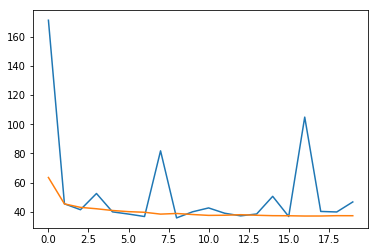

In [212]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [213]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 32)                224       
_________________________________________________________________
dense_115 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_18 (Batc (None, 64)                256       
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 128)               8320      
_________________________________________________________________
batch_normalization_19 (Batc (None, 128)               512       
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
__________

In [141]:
model.evaluate()

In [98]:
plt.plot()

array([[7.901826 ],
       [7.860941 ],
       [7.9001293],
       ...,
       [7.9050617],
       [7.9068346],
       [7.9043655]], dtype=float32)

In [214]:
# make predictions on the testing data
print("Predicting PM2.5")
preds = model.predict(testX)
preds
# diff = preds.flatten() - testY
# percentDiff = (diff / testY) * 100
# absPercentDiff = np.abs(percentDiff)
 
# # compute the mean and standard deviation of the absolute percentage
# # difference
# mean = np.mean(absPercentDiff)
# std = np.std(absPercentDiff)
 

# print("[INFO] Mean: {:.2f}%, std: {:.2f}%".format(mean, std))

Predicting PM2.5


array([[7.730313 ],
       [8.392146 ],
       [7.4339485],
       ...,
       [7.7550883],
       [7.6210175],
       [7.740387 ]], dtype=float32)

In [216]:
y_test.mean(), y_test.std()

(PM24H    15.068881
 dtype: float64, PM24H    7.691221
 dtype: float64)

In [217]:
preds.mean(), preds.std()

(7.889677, 0.50353)

In [104]:
r = pearsonr(testY.values,preds.flatten())[0]
r

0.07596305338977047

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(testY.values,preds.flatten())
rmse = np.sqrt(mean_squared_error(testY.values,preds.flatten()))
mae,rmse

(0.06870506165702908, 0.09743004781521537)

In [91]:
testY.values

array([0.34633854, 0.39885954, 0.10384154, ..., 0.12935174, 0.2319928 ,
       0.08313325])

In [92]:
preds.flatten()

array([0.14119773, 0.19585764, 0.12360987, ..., 0.16297862, 0.15462649,
       0.09677529], dtype=float32)

In [102]:
plt.scatter(y_test)
plt.scatter(preds)

TypeError: scatter() missing 1 required positional argument: 'y'